<a href="https://colab.research.google.com/github/yashmishra23/DeepLearning/blob/main/DL_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) # For reproducibility

# 1. Define Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 2. The MLP Structure
class SimpleMLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights randomly and biases to zero
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        self.loss_history = []

    def forward(self, X):
        # Layer 1 (Hidden)
        self.hidden_linear = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_activation = sigmoid(self.hidden_linear)

        # Layer 2 (Output)
        self.output_linear = np.dot(self.hidden_activation, self.weights_hidden_output) + self.bias_output
        self.output_final = sigmoid(self.output_linear)
        return self.output_final

    def backward(self, X, y, output, learning_rate):
        # Calculate Error
        error = y - output

        # --- Backpropagation (Chain Rule) ---
        # 1. Calculate Gradients for Output Layer
        d_output = error * sigmoid_derivative(output)

        # 2. Calculate Error for Hidden Layer
        error_hidden = d_output.dot(self.weights_hidden_output.T)
        d_hidden = error_hidden * sigmoid_derivative(self.hidden_activation)

        # 3. Update Weights and Biases
        self.weights_hidden_output += self.hidden_activation.T.dot(d_output) * learning_rate
        self.bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += X.T.dot(d_hidden) * learning_rate
        self.bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
            # Calculate Mean Squared Error
            loss = np.mean(np.square(y - output))
            self.loss_history.append(loss)

# 3. Prepare Data
# Input
X = np.array([0,1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
# Output
y = np.array([0,0,0,0,0,0,1,1,1,1,1]).reshape(-1, 1)

# 4. Train
nn = SimpleMLP(input_size=1, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

print("Final Predictions:")
print(nn.forward(X))

Final Predictions:
[[1.01513392e-04]
 [9.78521017e-05]
 [1.07468452e-04]
 [1.74270944e-04]
 [9.52836830e-04]
 [6.19789856e-02]
 [9.38035672e-01]
 [9.97183295e-01]
 [9.99037778e-01]
 [9.99284879e-01]
 [9.99337896e-01]]


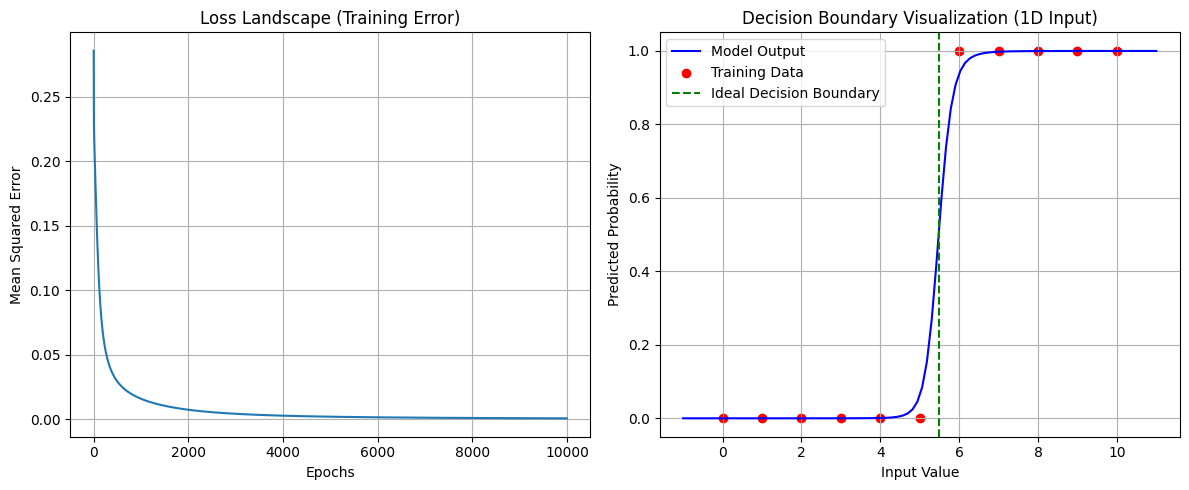

In [2]:
# --- Visualization 1: Loss Curve ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(nn.loss_history)
plt.title("Loss Landscape (Training Error)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True)

# --- Visualization 2: Decision Boundary (Activation Landscape) ---
plt.subplot(1, 2, 2)

# Generate a range of points for 1D input
x_plot = np.linspace(-1, 11, 100).reshape(-1, 1) # 100 points from -1 to 11
probs_plot = nn.forward(x_plot)

plt.plot(x_plot, probs_plot, color='blue', label='Model Output')
plt.scatter(X, y.flatten(), color='red', label='Training Data') # Plot original training data

# Adding an ideal decision boundary for a binary classification task
# Assuming the boundary is around X=5.5 based on the y values (0 for X<6, 1 for X>=6)
plt.axvline(x=5.5, color='green', linestyle='--', label='Ideal Decision Boundary')

plt.title("Decision Boundary Visualization (1D Input)")
plt.xlabel("Input Value")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()